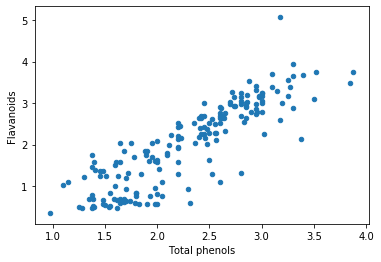

In [17]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA

data = pd.read_csv('wine.data.csv')

label = data['Label']
data = data.drop(columns=['Label'])

data.plot.scatter(x='Total phenols',y='Flavanoids') #Flavanoids seem to have an effect on other attributes


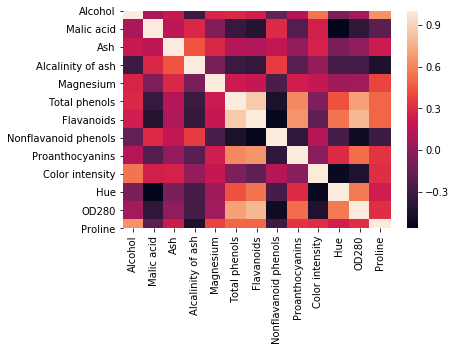

In [19]:
import seaborn as sns
corr = data.corr()
sns.heatmap(corr) # Total Phenois v Flavanoids, OD280 v Flavanoids high correlation

In [22]:
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()
StandardScaler.fit(data)
X_scaled_array = StandardScaler.transform(data)
normalizedData = pd.DataFrame(X_scaled_array, columns = data.columns)

print(normalizedData)


      Alcohol  Malic acid       Ash  Alcalinity of ash  Magnesium  \
0    1.518613   -0.562250  0.232053          -1.169593   1.913905   
1    0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2    0.196879    0.021231  1.109334          -0.268738   0.088358   
3    1.691550   -0.346811  0.487926          -0.809251   0.930918   
4    0.295700    0.227694  1.840403           0.451946   1.281985   
..        ...         ...       ...                ...        ...   
173  0.876275    2.974543  0.305159           0.301803  -0.332922   
174  0.493343    1.412609  0.414820           1.052516   0.158572   
175  0.332758    1.744744 -0.389355           0.151661   1.422412   
176  0.209232    0.227694  0.012732           0.151661   1.422412   
177  1.395086    1.583165  1.365208           1.502943  -0.262708   

     Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0         0.808997    1.034819             -0.659563         1.224884   
1         0.568648    0.7

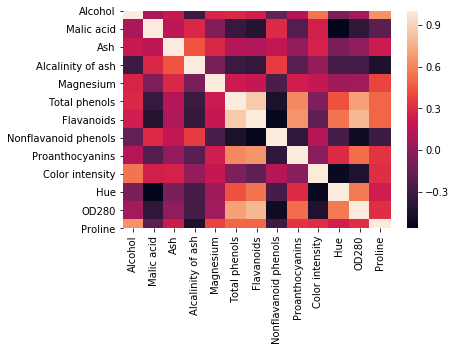

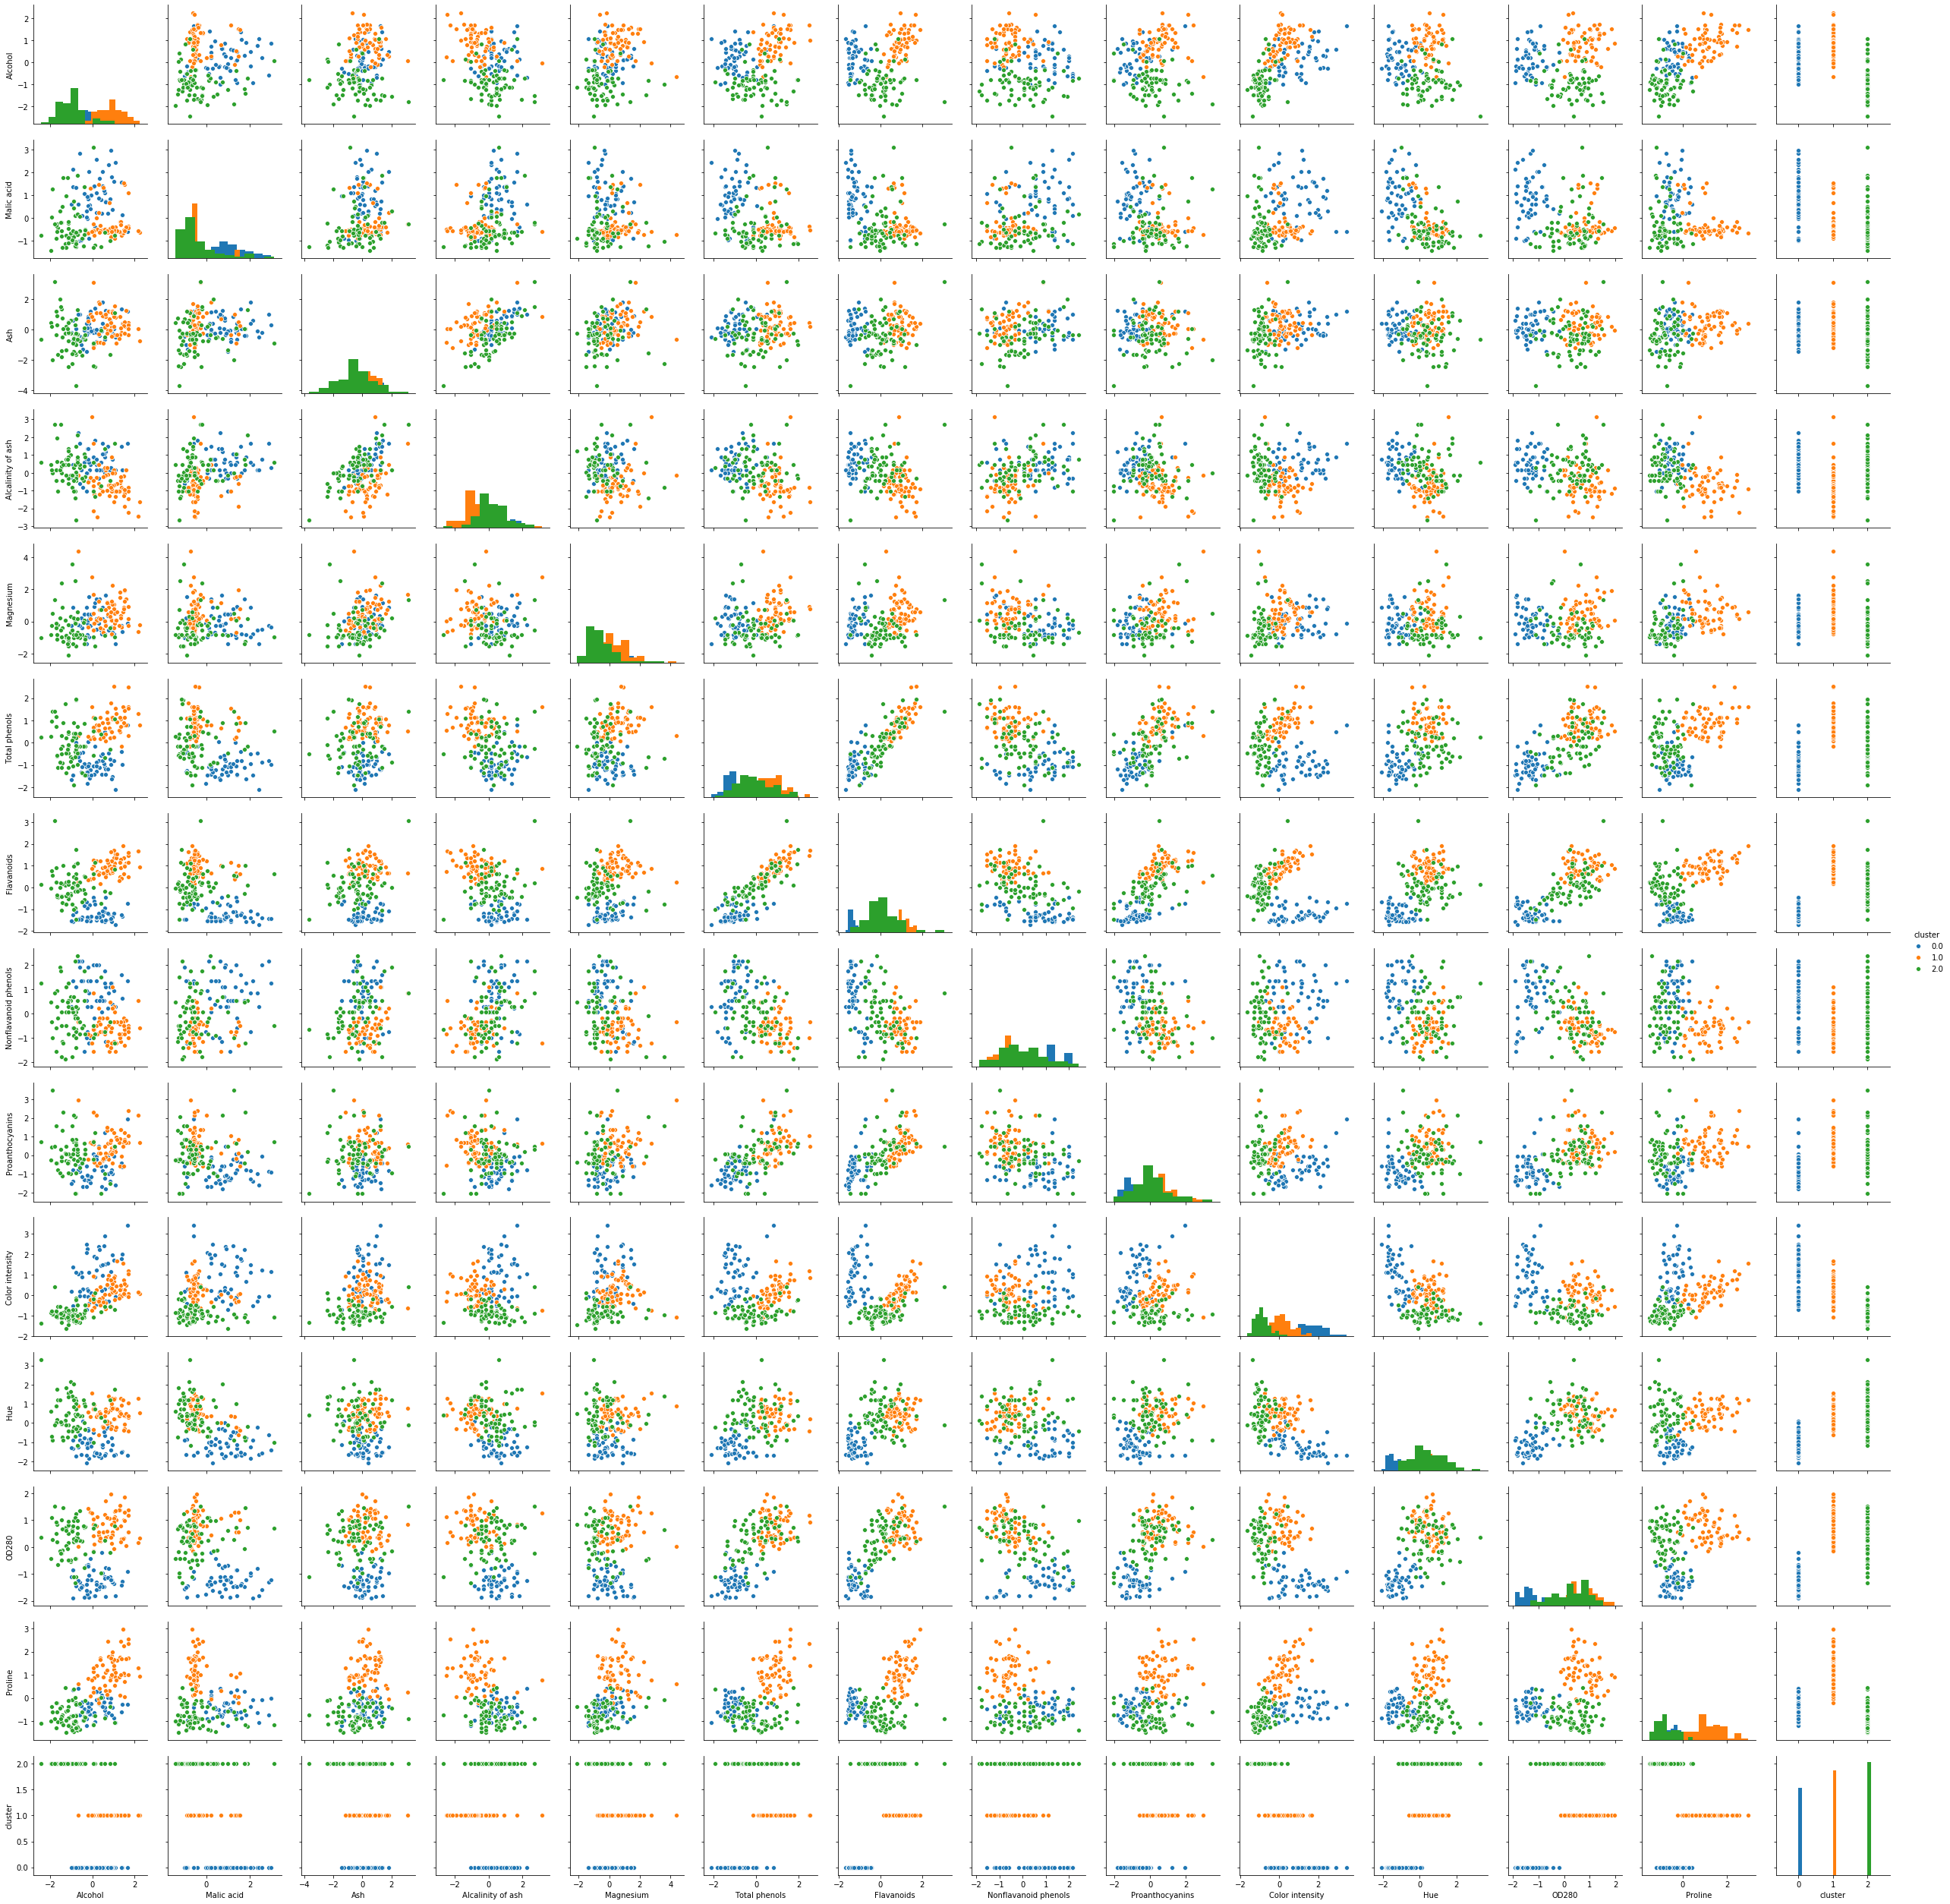

In [43]:
from sklearn.cluster import KMeans
kMeansClustering = KMeans(n_clusters = 3)
res = kMeansClustering.fit(normalizedData)

normalizedData["cluster"] = res.labels_.astype('float64')
sns_plot = sns.pairplot(normalizedData, hue = "cluster",diag_kind="hist")

In [46]:
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(label, normalizedData["cluster"]) #High level of matching labeling

0.9148795960669529